In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
import yfinance as yf

In [20]:
df = yf.download('TSLA', start='2021-01-01', end='2021-12-31')
df.index.name = 'date'
df.head()

[*********************100%%**********************]  1 of 1 completed

,Open,High,Low,Close,Adj Close,Volume
date,,,,,,
2021-01-04,239.820007,248.163330,239.063339,243.256668,243.256668,145914600
2021-01-05,241.220001,246.946671,239.733337,245.036667,245.036667,96735600
2021-01-06,252.830002,258.000000,249.699997,251.993332,251.993332,134100000
2021-01-07,259.209991,272.329987,258.399994,272.013336,272.013336,154496700
2021-01-08,285.333344,294.829987,279.463318,293.339996,293.339996,225166500


In [21]:
period = 20
#平均值
df['sma'] = df['Close'].rolling(period).mean()
#标准差
df['std'] = df['Close'].rolling(period).std()

#布林轨道上界
df['upper'] = df['sma'] + (2 * df['std'])
df['lower'] = df['sma'] - (2 * df['std'])

#决定
Close_list = pd.to_numeric(df['Close'],downcast='float')
upper_list = pd.to_numeric(df['upper'],downcast='float')
lower_list = pd.to_numeric(df['lower'],downcast='float')


df['buy'] = np.where(Close_list < lower_list, df['Close'], np.NaN)
df['sell'] = np.where(Close_list > upper_list, df['Close'], np.NaN)

In [22]:
df_buy = pd.to_numeric(df['buy'])
df_sell = pd.to_numeric(df['sell'])
df_index = df.index
ls_order = []
for i in range(len(df_buy)):
    if np.isnan(df_buy[i]):
        pass
    else:
        ls_order.append([df_index[i],'buy',df_buy[i],i])
for i in range(len(df_sell)):
    if np.isnan(df_sell[i]):
        pass
    else:
        ls_order.append([df_index[i],'sell',df_sell[i],i])

In [23]:
ls_profit = []
for one in ls_order:
    i = one[3]
    k_num = 7
    try:
        if one[1] == 'buy':
            ls_profit.append(float(nklater(df,i,k_num))-one[2])
        else:
            ls_profit.append(one[2]-float(nklater(df,i,k_num)))
    except:
         pass   

In [24]:
sum(ls_profit)

0

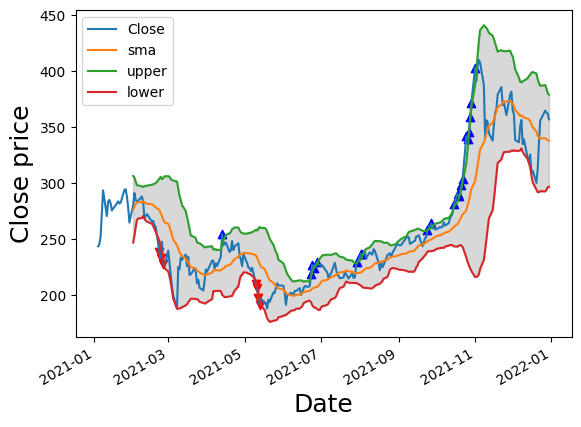

In [25]:
df = df.astype(float)
df[['Close','sma','upper','lower']].plot()
plt.xlabel('Date',fontsize=18)

plt.ylabel('Close price',fontsize=18)
x_axis = df.index
plt.fill_between(x_axis, df['lower'], df['upper'], color='grey', alpha=0.30)

plt.scatter(df.index,df['buy'], color='red', label='Buy', marker='v', alpha=1)
plt.scatter(df.index,df['sell'], color='blue', label='Sell', marker='^', alpha=1)
   
plt.show() 